# Project Desain Analisis Algoritma Sains Data Semester 3

### Kelompok 2

1. L0224012 - Trisha Garnis Wahyuningrun
2. L0224014 - Alvian Damar Budhi Hernowo
3. L0224037 - Talitha Sukma Mahardika

## Membuat Graph

In [2]:
import networkx as nx
import json
import random
import os

# Buat folder data jika belum ada
os.makedirs("data", exist_ok=True)

In [3]:
def generate_bem_graph(n_total, seed):
    random.seed(seed)
    n_a = int(n_total * 0.4)
    n_b = int(n_total * 0.35)
    n_c = n_total - n_a - n_b
    G_A = nx.barabasi_albert_graph(n=n_a, m=10, seed=seed)
    G_B = nx.barabasi_albert_graph(n=n_b, m=10, seed=seed+1)
    G_C = nx.barabasi_albert_graph(n=n_c, m=10, seed=seed+2)
    G_total = nx.disjoint_union_all([G_A, G_B, G_C])
    G_total.add_edge(0, n_a)             
    G_total.add_edge(n_a, n_a + n_b)
    G_total.add_edge(0, n_a + n_b)     
    node_data = {}
    nama = []
    file = open("data/nama.csv","a+")
    file.seek(0)
    for i in file.readlines() :
        nama.append(i)
    file.close()
    nnama = len(nama) - 1
    for node_id in G_total.nodes():
        if node_id < n_a:
            divisi = "Divisi Acara"
            jabatan = "Ketua Divisi" if node_id == 0 else "Staff"
        elif node_id < (n_a + n_b):
            divisi = "Divisi Humas"
            jabatan = "Ketua Divisi" if node_id == n_a else "Staff"
        else:
            divisi = "Divisi Logistik"
            jabatan = "Ketua Divisi" if node_id == (n_a + n_b) else "Staff"
        nama1 = nama.pop(random.randint(0,nnama)).strip()
        nama2 = nama.pop(random.randint(0,nnama-1)).strip()
        nnama -= 2
        node_data[str(node_id)] = {
            "nama": nama1 + " " + nama2,
            "divisi": divisi,
            "jabatan": jabatan,
            "ipk": round(random.uniform(2.5, 4.0), 2)
        }
    adj_list = nx.to_dict_of_lists(G_total)
    file = open("data/Biodata.csv","w")
    file.write("id;nama;divisi;jabatan;ipk\n")
    for i in range(n_total) :
        file.write(f"{i};{node_data[str(i)]['nama']};{node_data[str(i)]['divisi']};{node_data[str(i)]['jabatan']};{node_data[str(i)]['ipk']}\n")
    
    return adj_list, node_data

In [4]:
n = 100
seed = 121437 
adj_list, node_data = generate_bem_graph(n, seed)      
output_content = {
    "project": "connected_components_social_graph",
    "description": f"Graf BEM {n} nodes dengan Data Atribut",
    "n_nodes": n,
    "graph_adj": adj_list,
    "node_data": node_data
}       
filename = f"data/social_graph_N{n}.json"
with open(filename, "w") as f:
    json.dump(output_content, f, indent=2)           
print(f"[OK] Berhasil membuat: {filename} (Lengkap dengan data mahasiswa)")

[OK] Berhasil membuat: data/social_graph_N100.json (Lengkap dengan data mahasiswa)


## DFS (Depth First Search)

In [5]:
def dfs(adj_list,start,goal,hasil) :
    for i in adj_list[start] :
        if i not in hasil and i != start :
            hasil[i] = [start]
            if i == goal :
                return True
            if dfs(adj_list,i,goal,hasil) :
                return True
    return False

In [6]:
def dfs_trans(adj_list,start,hasil,sepuh) :
    for i in adj_list[start] :
        if i not in hasil and i != sepuh :
            hasil[i] = [start]
            dfs_trans(adj_list,i,hasil,sepuh)
    return hasil

## BFS (Breadth First Search)

In [7]:
def bfs(adj_list,start,goal,hasil) :
    qiu = []
    for i in adj_list[start] :
        if i not in hasil :
            hasil[i] = [start]
            qiu.append(i)
            if i == goal :
                return True
    while qiu :
        cabang = qiu.pop(0)
        for i in adj_list[cabang] :
            if i not in hasil :
                hasil[i] = [cabang]
                qiu.append(i)
            if i == goal :
                return True
    return False

In [8]:
def bfs_trans(adj_list,start,hasil) :
    hasil[start] = []
    qiu = []
    for i in adj_list[start] :
        if i not in hasil and i != start :
            hasil[i] = [start]
            qiu.append(i)
    while qiu :
        cabang = qiu.pop(0)
        for i in adj_list[cabang] :
            if i not in hasil and i != start :
                hasil[i] = [cabang]
                qiu.append(i)
    return hasil

## Hasil

In [9]:
def backtrack(tree,start,goal) :
    hasil = [goal]
    while True :
        hasil = tree[goal] + hasil
        goal = tree[goal][0]
        if goal == start :
            break
    return hasil

In [10]:
hasil = {}
start = 1
goal = 50
if not (dfs(adj_list,start,goal,hasil)) :
    print("Tidak Ditemukan Jalur")
else :
    for i in backtrack(hasil,start,goal) :
        if i == start :
            print(i,end="")
        else :
            print(f" - {i}",end="")

1 - 0 - 40 - 41 - 51 - 42 - 52 - 45 - 57 - 47 - 53 - 43 - 56 - 46 - 55 - 49 - 54 - 48 - 59 - 50

In [11]:
hasil = {}
start = 1
goal = 50
if not (bfs(adj_list,start,goal,hasil)) :
    print("Tidak Ditemukan Jalur")
else :
    for i in backtrack(hasil,start,goal) :
        if i == start :
            print(i,end="")
        else :
            print(f" - {i}",end="")

1 - 0 - 40 - 50

## Visualisasi

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

In [63]:
def v_graph(tree):
    tree_reverse = nx.DiGraph()

    for child, parents in tree.items():
        for parent in parents:
            tree_reverse.add_edge(parent, child)

    plt.figure(figsize=(18, 18))
    pos = nx.nx_pydot.graphviz_layout(tree_reverse, prog="dot")
    nx.draw(tree_reverse, pos, with_labels=True, node_size=800, font_size=12, arrows=True)
    plt.show()

### Graph

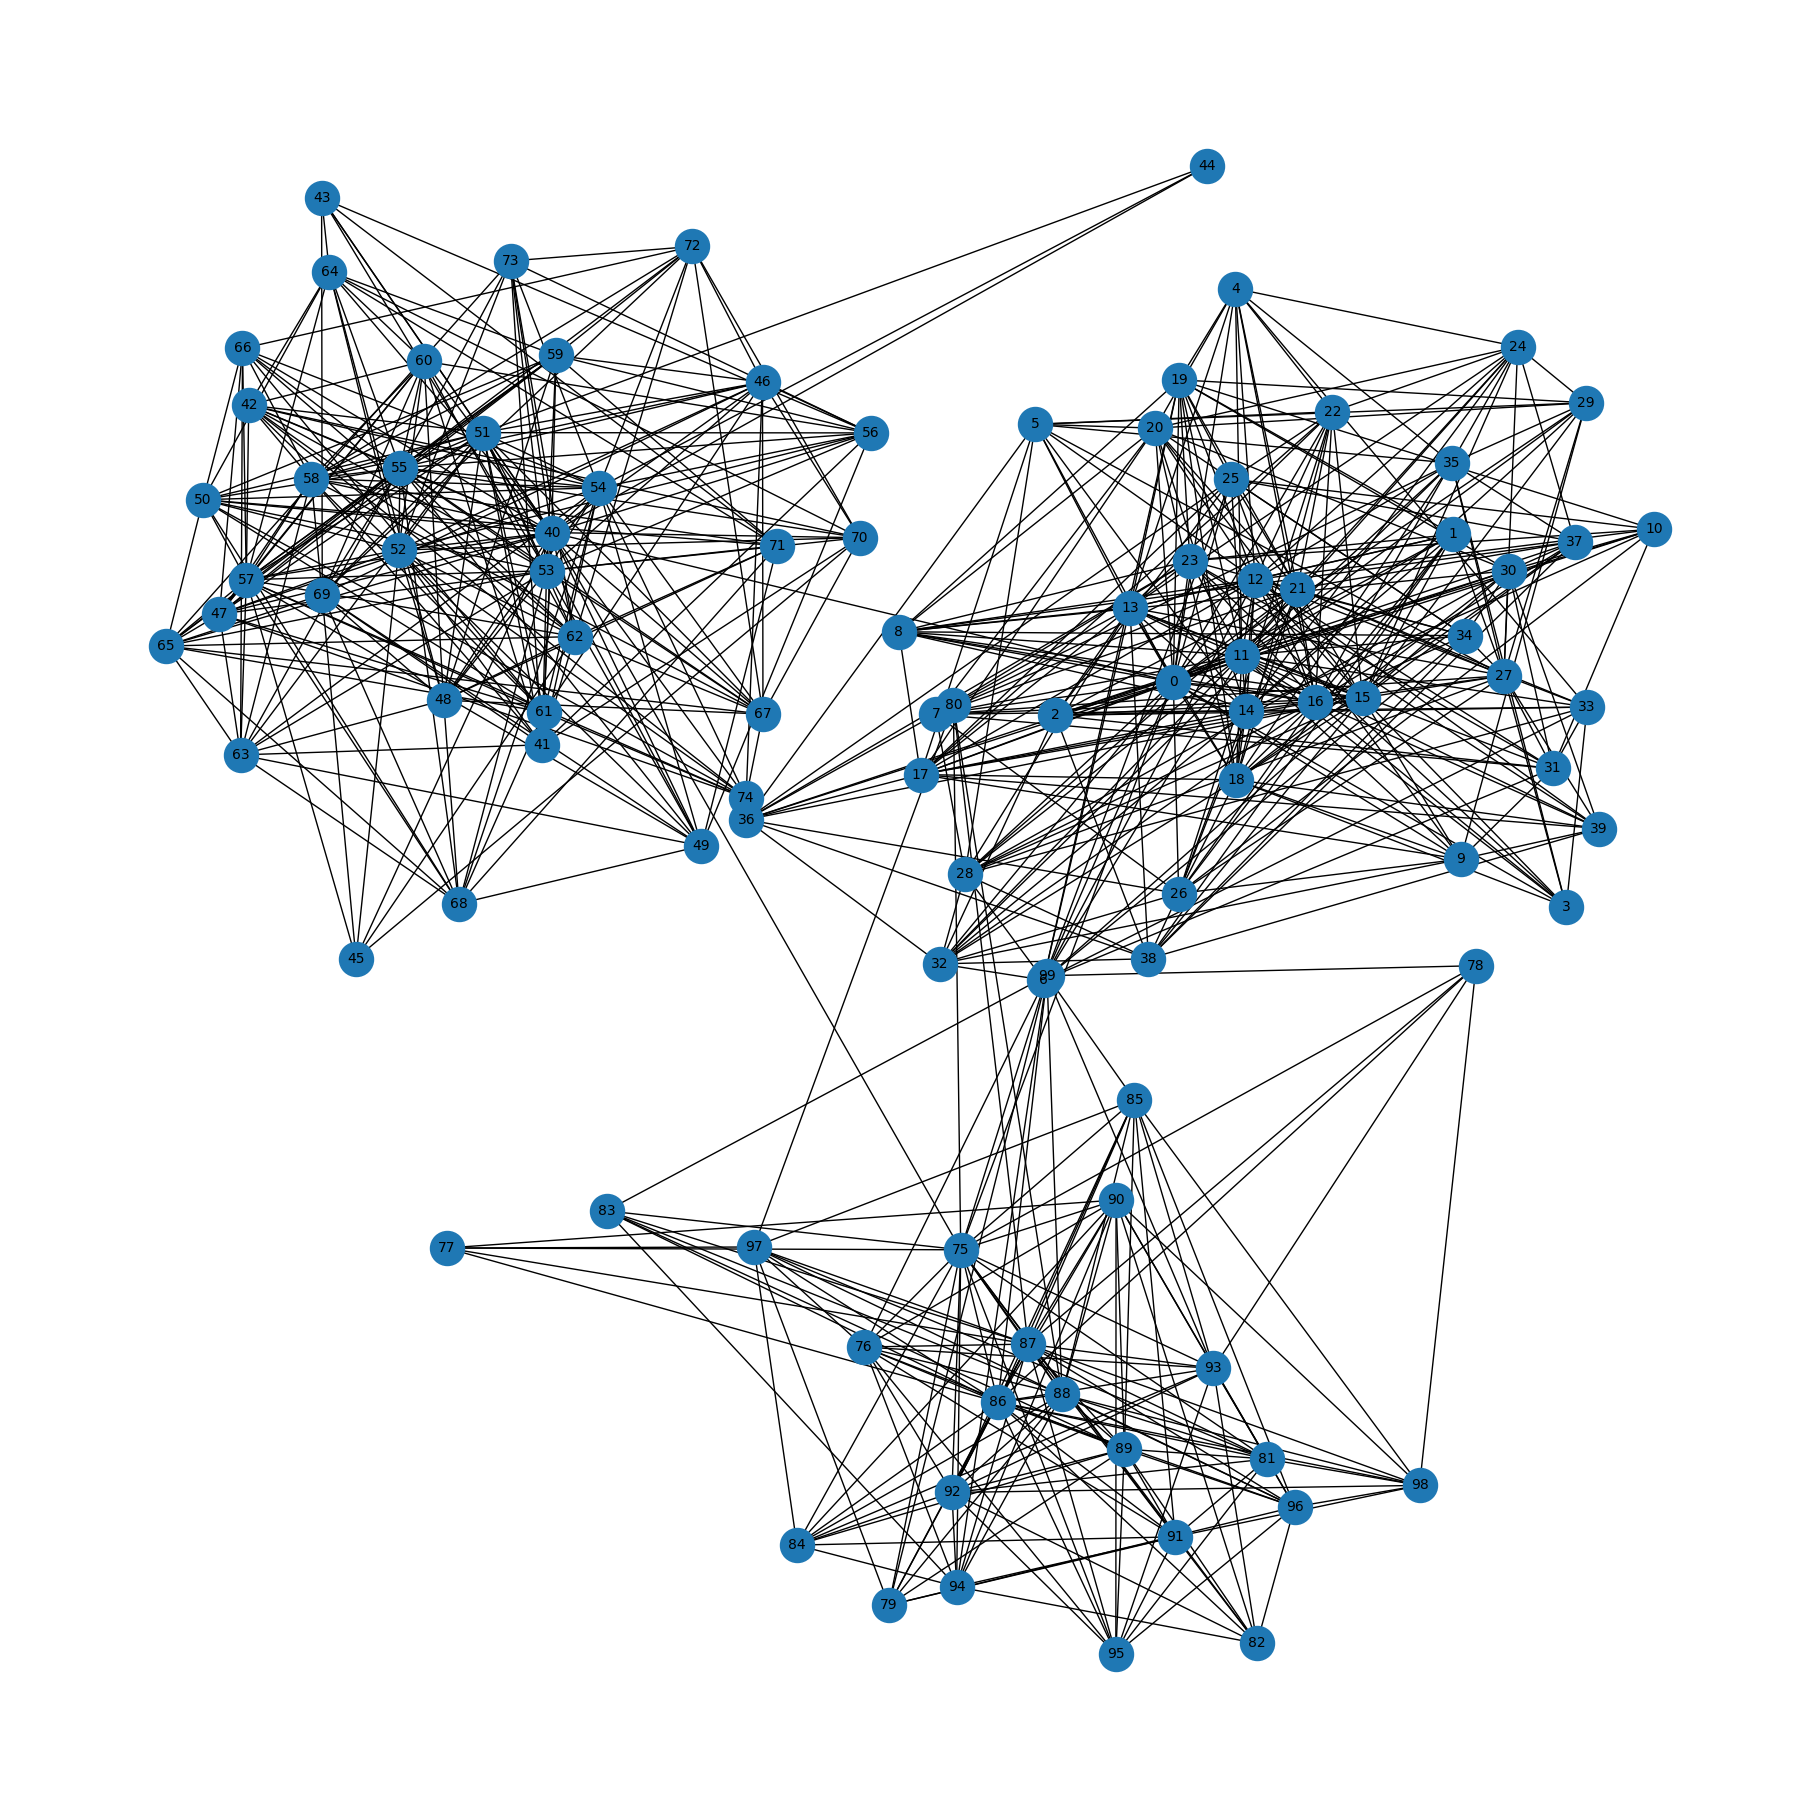

In [69]:
G = nx.Graph(adj_list)

# pos = nx.nx_pydot.graphviz_layout(G, prog="dot")
pos = nx.spring_layout(G, k=2.5, iterations=200)
plt.figure(figsize=(18, 18))
nx.draw(G, pos, with_labels=True, node_size=600, font_size=10)
plt.show()

### DFS Transversal

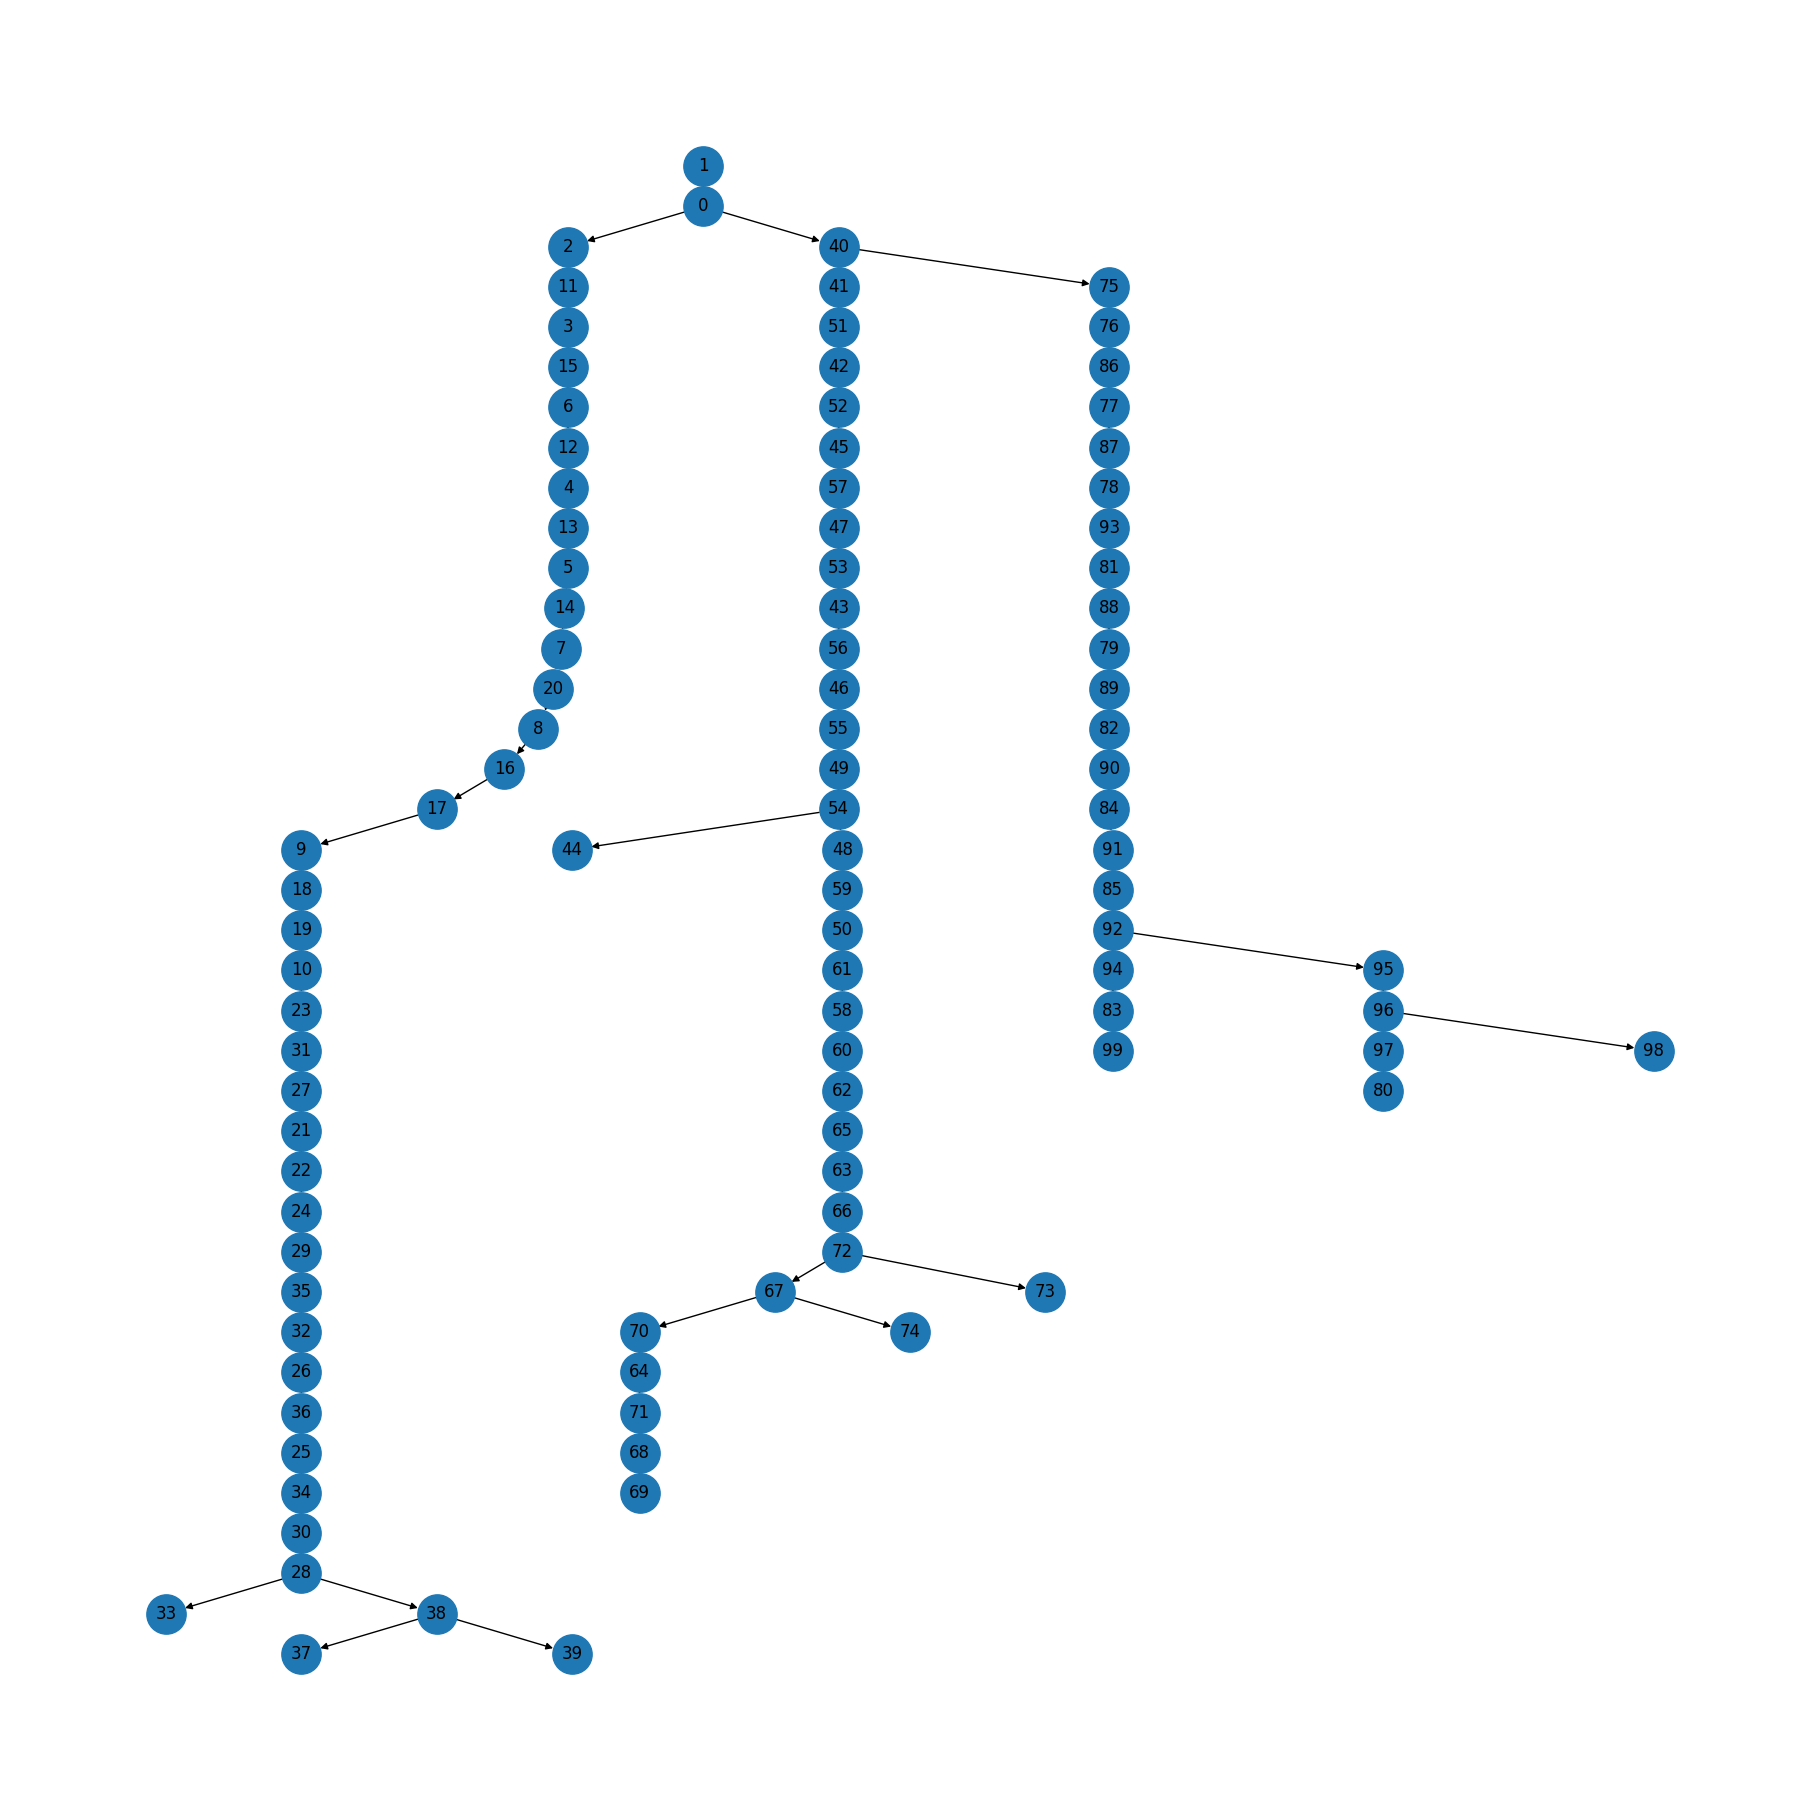

In [64]:
root = 1
v_graph(dfs_trans(adj_list,root,{},root))

### BFS Transversal

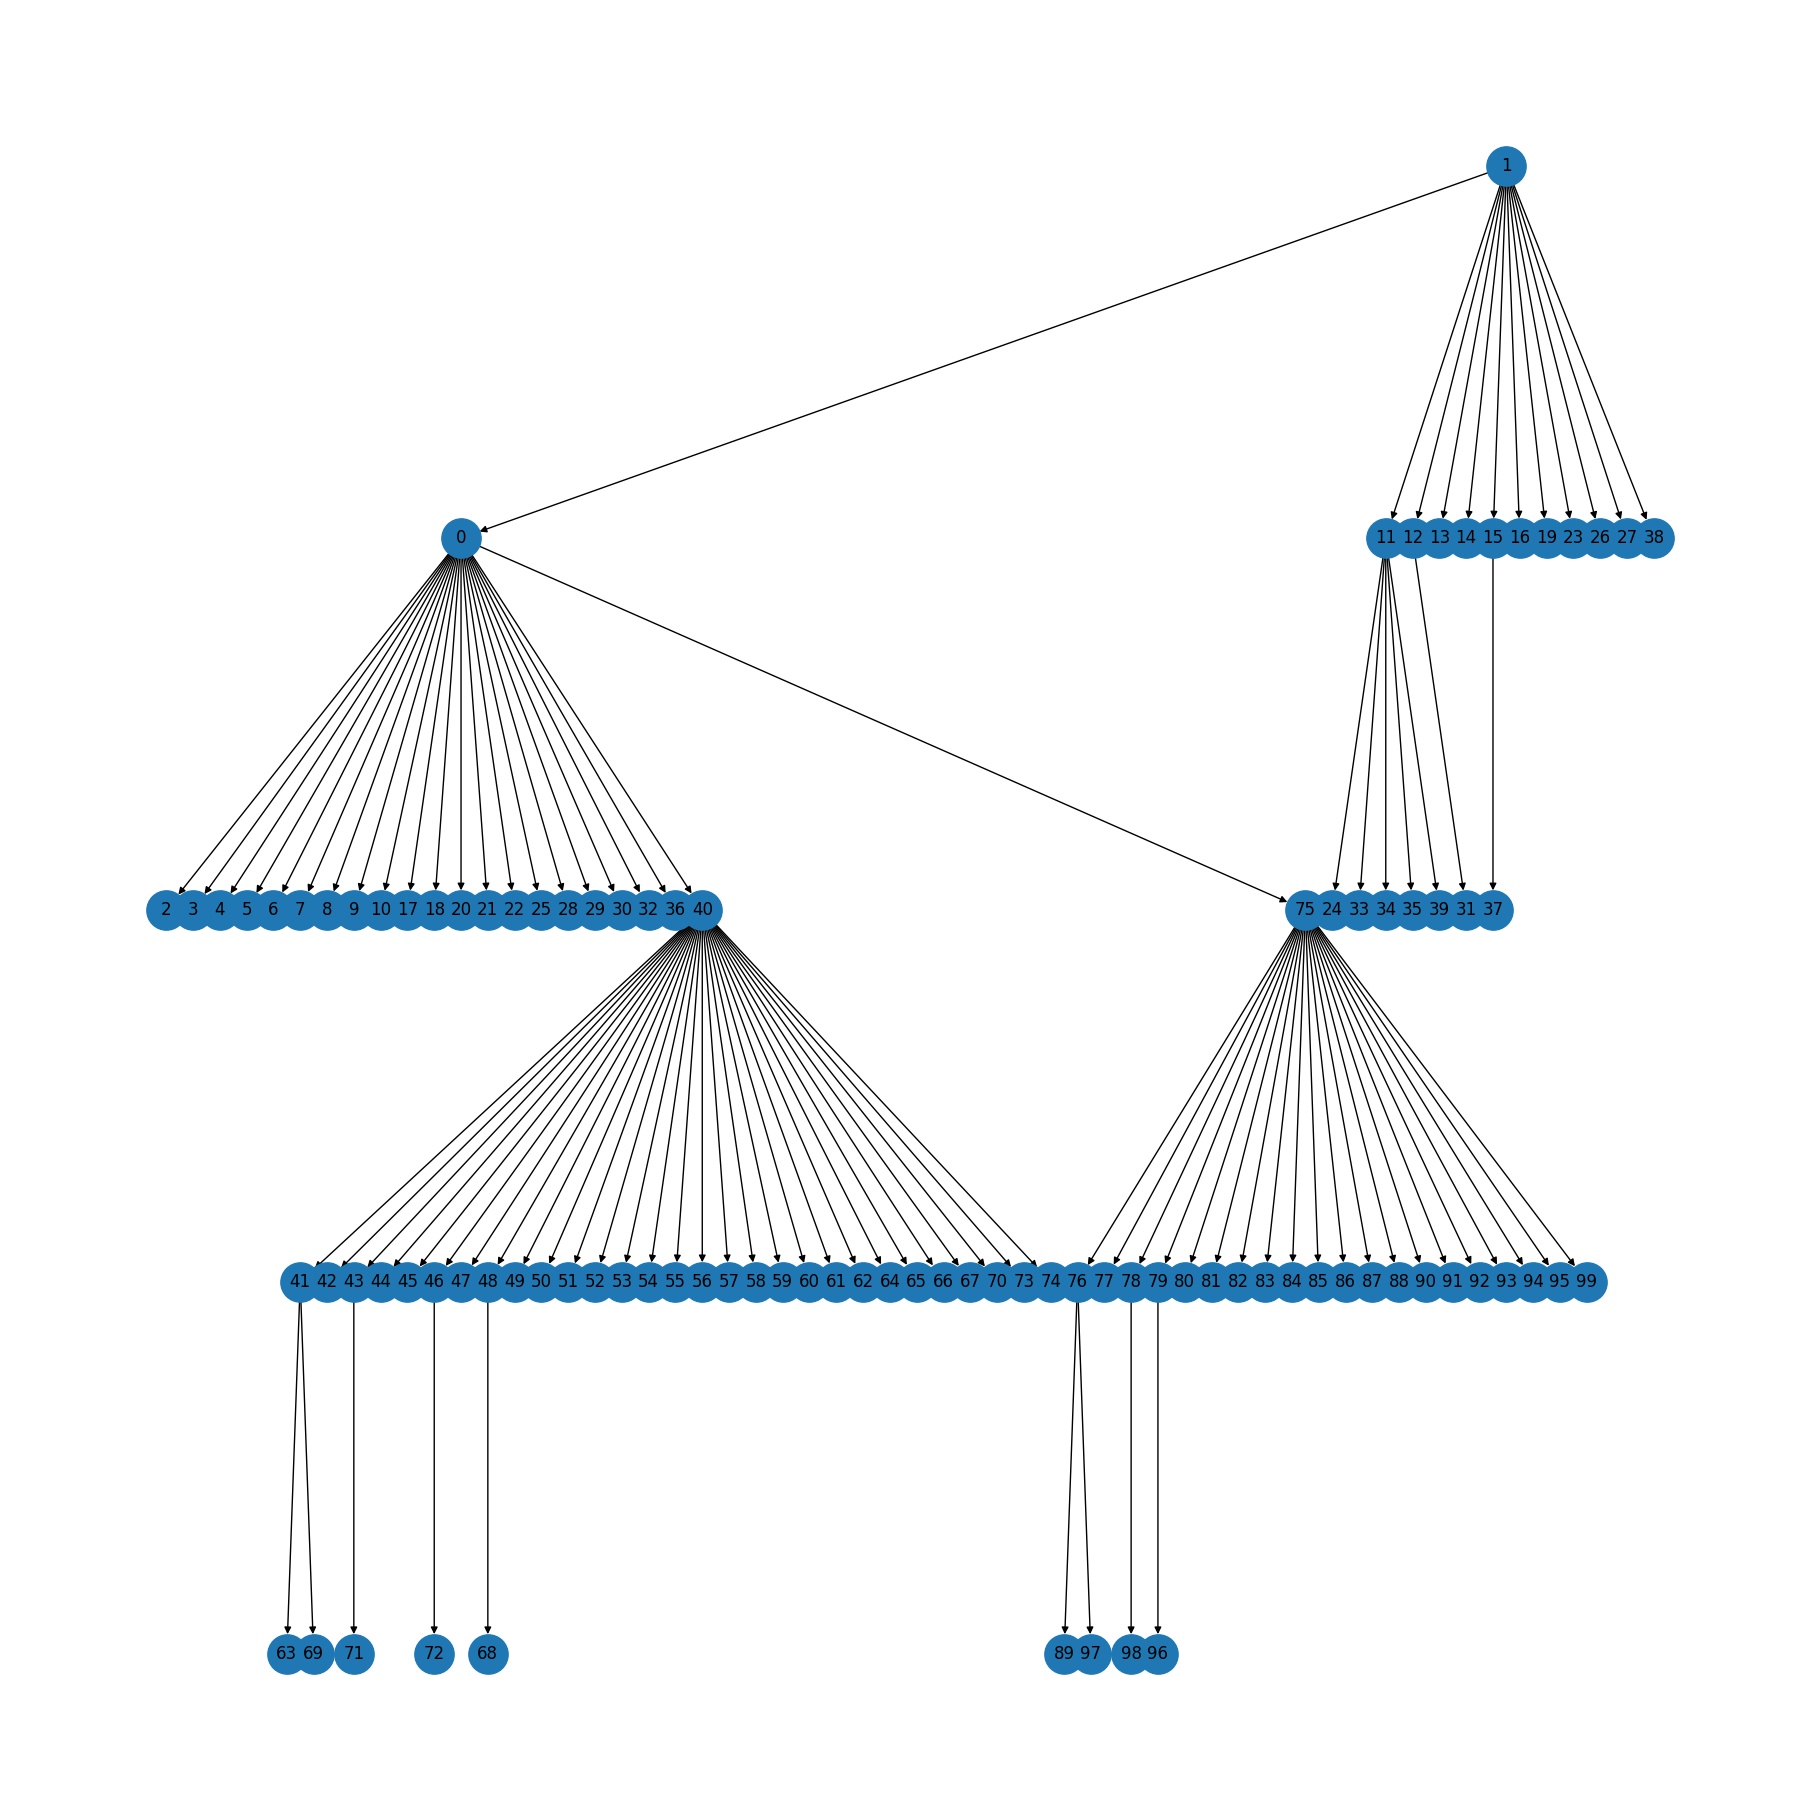

In [68]:
root = 1
v_graph(bfs_trans(adj_list,root,{}))